In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Chest X ray dataset/train'
valid_path = '/content/drive/MyDrive/Chest X ray dataset/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Chest X ray dataset/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Chest X ray dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5227 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Chest X ray dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-14-258e84a3347f>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
164/164 [==============================] - 3350s 20s/step - loss: 0.1741 - accuracy: 0.9275 - val_loss: 0.2799 - val_accuracy: 0.9119
Epoch 2/5
164/164 [==============================] - 3218s 20s/step - loss: 0.1312 - accuracy: 0.9510 - val_loss: 0.2604 - val_accuracy: 0.9167
Epoch 3/5
164/164 [==============================] - 3246s 20s/step - loss: 0.0935 - accuracy: 0.9650 - val_loss: 0.2749 - val_accuracy: 0.9199
Epoch 4/5
164/164 [==============================] - 3165s 19s/step - loss: 0.1011 - accuracy: 0.9610 - val_loss: 0.3980 - val_accuracy: 0.8942
Epoch 5/5
164/164 [==============================] - 3170s 19s/step - loss: 0.0973 - accuracy: 0.9646 - val_loss: 0.2940 - val_accuracy: 0.9135


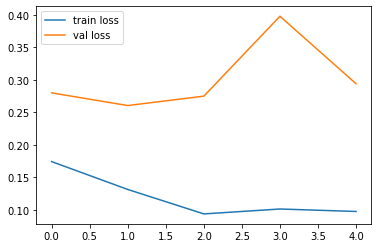

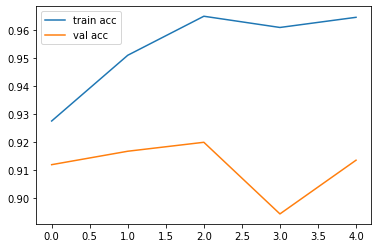

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

#import tensorflow as tf

#from keras.models import load_model

#model.save('/content/drive/MyDrive/saved1 model/model_vgg16.h5')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("/content/drive/MyDrive/saved model/model_vgg16.h5")

In [ ]:
from tensorflow.keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import tensorflow as tf

model=load_model("/content/drive/MyDrive/saved model/model_vgg16.h5")

#model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/drive/MyDrive/Chest X ray dataset/val/PNEUMONIA/person1951_bacteria_4882.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 1s 672ms/step


In [ ]:
print(features)


[[0. 1.]]


In [ ]:
# Python program to convert a list
# to string using list comprehension

# using list comprehension
listToStr = ' '.join(map(str, features))

print(listToStr)

[0. 1.]


In [ ]:
x = listToStr.split()

print(x[1])

1.]


In [ ]:
normal = x[0].replace("[", "")
pneumonia = x[1].replace("]", "")

In [ ]:
normal

'0.'

In [ ]:
pneumonia

'1.'